# Image Classification with HOG Feature and Neural Networks

In [2]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 995.1 kB/s eta 0:00:00:0100:010m


In [3]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from mlxtend.data import loadlocal_mnist
from sklearn.neural_network import MLPClassifier

## 1. Dataset Preparation

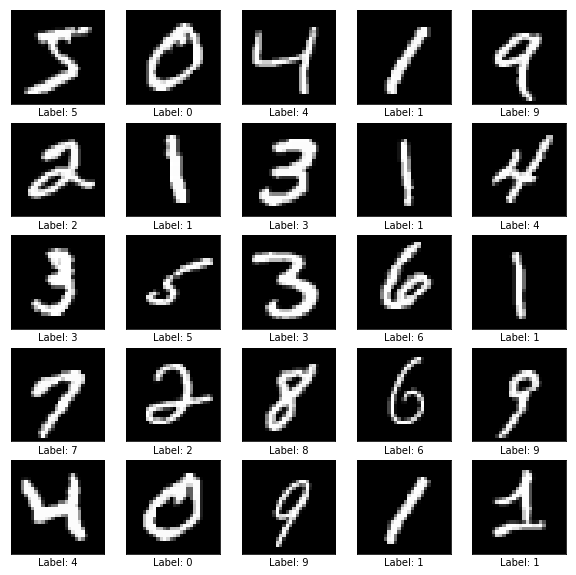

**Download MNIST dataset**

In [ ]:
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P ../images/mnist-dataset

In [ ]:
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P ../images/mnist-dataset

In [ ]:
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P ../images/mnist-dataset

In [ ]:
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P ../images/mnist-dataset

**Extract gzip file**

In [ ]:
!gzip -d ../images/mnist-dataset/train-images-idx3-ubyte.gz 

In [ ]:
!gzip -d ../images/mnist-dataset/train-labels-idx1-ubyte.gz

In [ ]:
!gzip -d ../images/mnist-dataset/t10k-images-idx3-ubyte.gz

In [ ]:
!gzip -d ../images/mnist-dataset/t10k-labels-idx1-ubyte.gz

In [2]:
!ls ../images/mnist-dataset/

t10k-images-idx3-ubyte	train-images-idx3-ubyte
t10k-labels-idx1-ubyte	train-labels-idx1-ubyte


**Load image dataset**

In [13]:
images_path = '/Users/elektro/Documents/MACHINE VISION /train-images.idx3-ubyte'
labels_path = '/Users/elektro/Documents/MACHINE VISION /train-labels.idx1-ubyte'
train_images, train_labels = loadlocal_mnist(images_path=images_path, labels_path=labels_path)

In [15]:
images_path = '/Users/elektro/Documents/MACHINE VISION /t10k-images.idx3-ubyte'
labels_path = '/Users/elektro/Documents/MACHINE VISION /t10k-labels.idx1-ubyte'
test_images, test_labels = loadlocal_mnist(images_path=images_path, labels_path=labels_path)

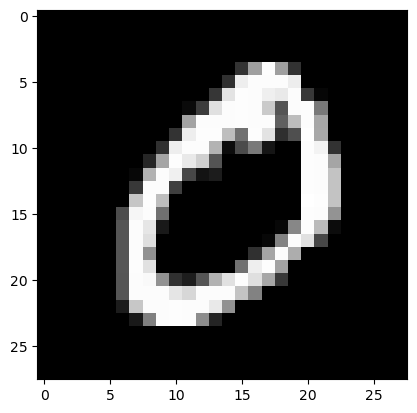

In [16]:
plt.imshow(train_images[1].reshape(28,28), cmap='gray')

In [17]:
train_labels[1]

0

**Test extract HOG feature from image**

In [18]:
feature, hog_img = hog(train_images[1].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

In [19]:
feature.shape

(144,)

<BarContainer object of 144 artists>

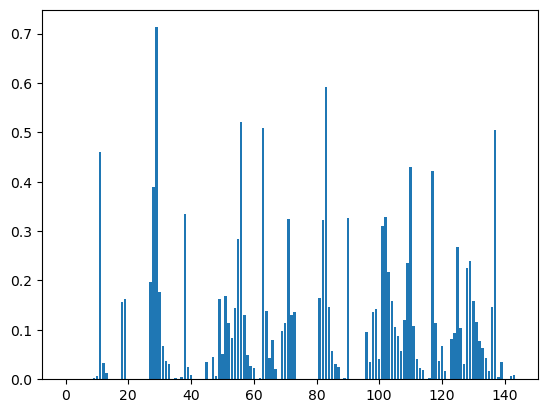

In [20]:
plt.bar(list(range(feature.shape[0])), feature)

In [21]:
feature, hog_img = hog(train_images[0].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

<BarContainer object of 144 artists>

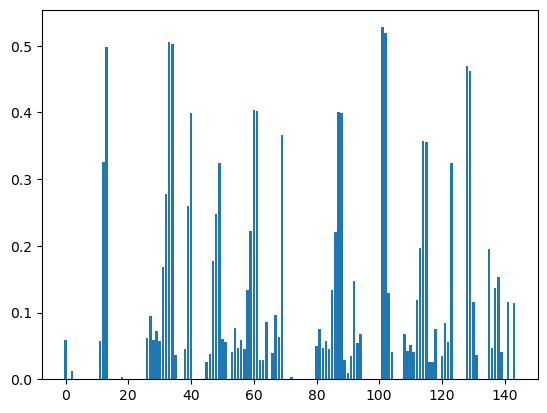

In [22]:
plt.bar(list(range(feature.shape[0])), feature)

## 2. Preprocessing using HOG Feature Extraction

In [23]:
n_dims = feature.shape[0]

In [24]:
n_dims

144

In [25]:
n_samples = train_images.shape[0]

In [26]:
n_samples

60000

**Create variable for dataset**

In [27]:
X_train, y_train = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [28]:
X_train.shape

(60000, 144)

**Get HOG feature from each image & put into dataset variable**

In [29]:
for i in range(n_samples):
    X_train[i], _ = hog(train_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_train[i] = train_labels[i]

**Convert categorical label to one hot label**

In [31]:
from sklearn.preprocessing import LabelBinarizer

In [33]:
lb = LabelBinarizer()

In [34]:
lb.fit(y_train)

LabelBinarizer()

In [35]:
y_train_one_hot = lb.transform(y_train)

In [36]:
y_train_one_hot[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [37]:
y_train[0]

5

In [38]:
import numpy as np

In [39]:
label = lb.inverse_transform(np.array([y_train_one_hot[0]]))

In [40]:
label[0]

5

## 3. Classification with Neural Networks

In [41]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 10), solver='sgd', learning_rate_init=0.001, max_iter=100)

In [42]:
clf.fit(X_train, y_train_one_hot)

/Users/elektro/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64, 10), max_iter=100, solver='sgd')

## 4. Predict Test Dataset 

In [43]:
n_samples = test_images.shape[0]

In [44]:
X_test, y_test = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [45]:
for i in range(n_samples):
    X_test[i], _ = hog(test_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_test[i] = test_labels[i]

In [46]:
y_test_one_hot = lb.transform(y_test)

In [47]:
y_pred_one_hot = clf.predict(X_test)

In [48]:
y_pred = lb.inverse_transform(y_pred_one_hot)

In [49]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

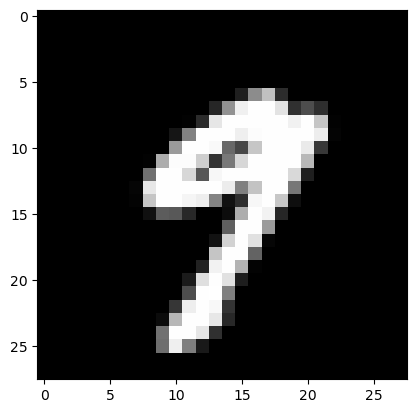

In [50]:
plt.imshow(test_images[20].reshape(28,28), cmap='gray')

In [51]:
out_one_hot = clf.predict(X_test[20].reshape(1, n_dims))

In [52]:
out_one_hot

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [53]:
out = lb.inverse_transform(out_one_hot.reshape(1,10))

In [54]:
out[0]

9

## 5. Evaluation Metrics

### 5. 1 Confussion Matrix

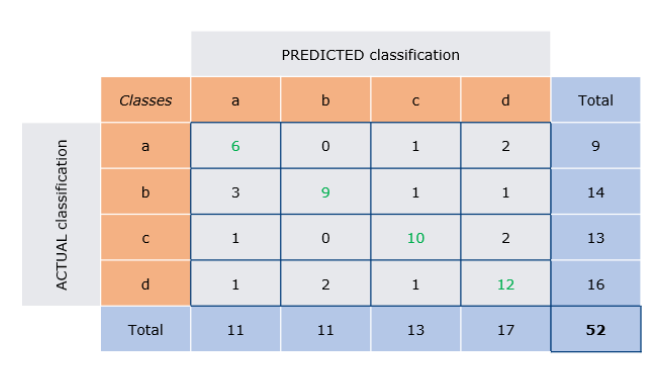

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
conf_mat = confusion_matrix(y_test, y_pred)

In [57]:
conf_mat

array([[ 974,    0,    0,    0,    0,    3,    1,    2,    0,    0],
       [  19, 1106,    3,    0,    5,    0,    2,    0,    0,    0],
       [  51,    0,  969,    3,    2,    0,    3,    2,    1,    1],
       [  21,    0,   14,  955,    0,    8,    0,    5,    2,    5],
       [  41,    4,    3,    0,  917,    0,    4,    3,    4,    6],
       [  35,    0,    0,   10,    0,  840,    1,    0,    5,    1],
       [  32,    3,    1,    0,    1,   10,  911,    0,    0,    0],
       [  36,    1,   17,    3,   10,    0,    0,  948,    1,   12],
       [  41,    1,    4,    7,    4,    4,    5,    0,  902,    6],
       [  35,    0,    0,    1,   17,    4,    0,    5,   17,  930]])

In [58]:
from mlxtend.plotting import plot_confusion_matrix

In [60]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

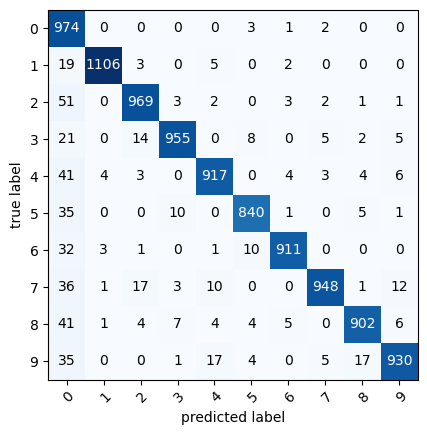

In [62]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

### 5.2 Precission

$$\text { Precision }=\frac{T P}{T P+F P}$$

In [63]:
from sklearn.metrics import precision_score

In [64]:
precision = precision_score(y_test, y_pred, average=None)

In [65]:
precision

array([0.75797665, 0.99192825, 0.95845697, 0.97548519, 0.95920502,
       0.96662831, 0.98274002, 0.98238342, 0.96781116, 0.96774194])

### 5.3 Recall

$$\text { Recall }=\frac{T P}{T P+F N}$$

In [66]:
from sklearn.metrics import recall_score

In [67]:
recall = recall_score(y_test, y_pred, average=None)

In [68]:
recall

array([0.99387755, 0.97444934, 0.93895349, 0.94554455, 0.93380855,
       0.94170404, 0.95093946, 0.92217899, 0.92607803, 0.92170466])

### 5.4 Accuracy

$$\text { Accuracy }=\frac{T P+T N}{T P+T N+F P+F N}$$

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy = accuracy_score(y_test, y_pred)

In [71]:
accuracy

0.9452

### 5.5 F1-Score

$$\text { F1-Score }=\left(\frac{2}{\text { precision }^{-1}+\text { recall }^{-1}}\right)=2 \cdot\left(\frac{\text { precision } \cdot \text { recall }}{\text { precision }+\text { recall }}\right)$$

In [72]:
from sklearn.metrics import f1_score

In [73]:
f1 = f1_score(y_test, y_pred, average='macro')

In [74]:
f1

0.946093676342295